In [5]:
# Install torch before importing panns_inference
!pip install torch
# Install librosa
!pip install librosa


import os
import pandas as pd
import librosa
import csv
import numpy as np
from pathlib import Path


# Install panns_inference
!pip install panns_inference

# Import panns_inference after installing torch
from panns_inference import SoundEventDetection
import matplotlib.pyplot as plt

# Modify config.py in the panns_inference package
import os

# Replace this line in config.py
# labels_csv_path = os.path.join(os.getcwd(), 'panns_data', 'class_labels_indices.csv')
# With the absolute path you provided



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\yasmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\yasmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\yasmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import os

# Replace this line
# labels_csv_path = os.path.join(os.path.dirname(__file__), 'panns_data', 'class_labels_indices.csv')
print(os.getcwd())
# With this line
labels_csv_path = os.path.join(os.getcwd(), 'panns_data', 'class_labels_indices.csv')


c:\Users\yasmi\Downloads\Data


In [7]:
labels_csv_path

'c:\\Users\\yasmi\\Downloads\\Data\\panns_data\\class_labels_indices.csv'

In [8]:
!pip install tqdm


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\yasmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Checkpoint path: Cnn14_DecisionLevelMax_mAP=0.385.pth
Using CPU.


Processing audio files: 100%|██████████| 4/4 [03:07<00:00, 46.78s/file]


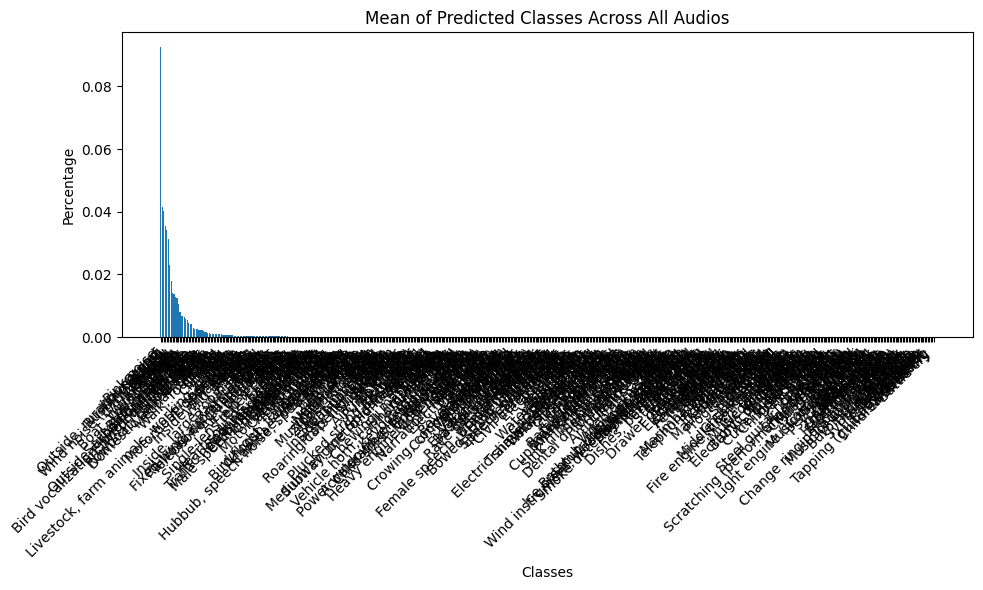

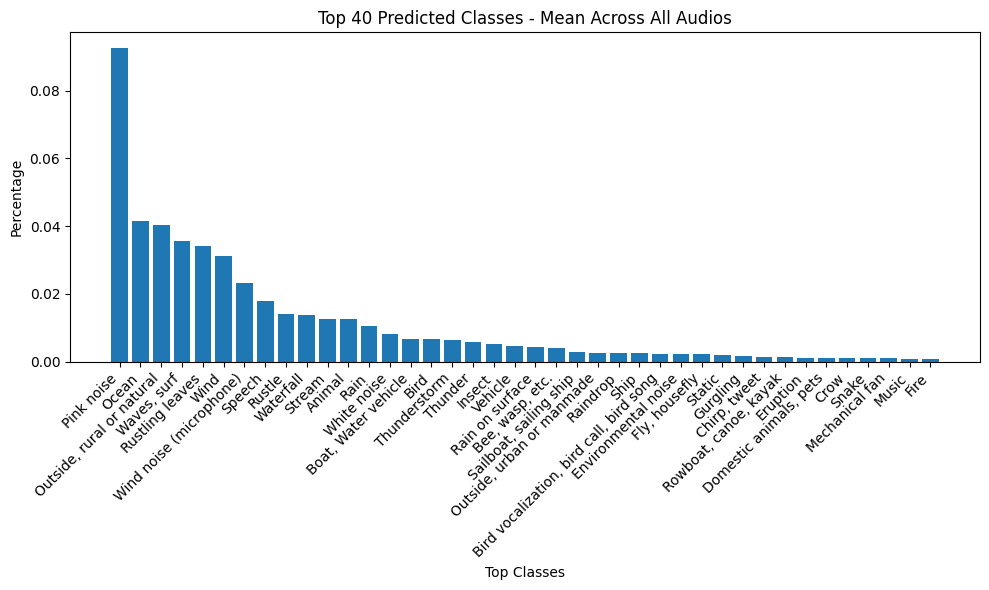

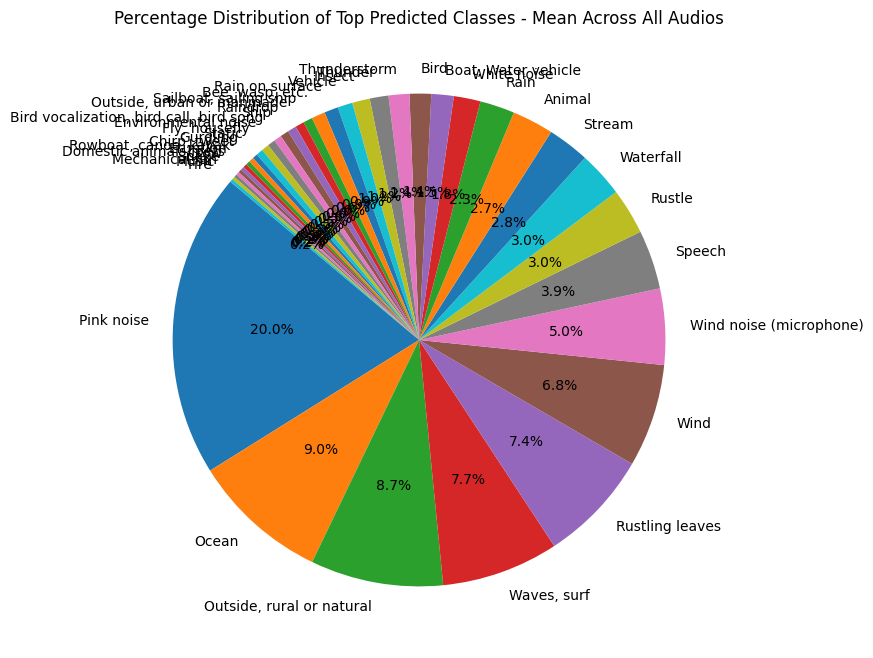

In [10]:
from tqdm import tqdm
# Initialize the SoundEventDetection model
sed = SoundEventDetection(checkpoint_path='Cnn14_DecisionLevelMax_mAP=0.385.pth', device='cuda')  # Use 'cuda' if GPU is available, otherwise use 'cpu'

# Initialize class labels
labels_csv_path = 'class_labels_indices.csv'
with open(labels_csv_path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    lines = list(reader)

labels = []
ids = []  # Each label has a unique id such as "/m/068hy"
for i1 in range(1, len(lines)):
    id = lines[i1][1]
    label = lines[i1][2]
    ids.append(id)
    labels.append(label)

class_labels = labels  # Use loaded class labels

# Define the directory containing audio files
audio_dir = './Data_test'
# Lists to store aggregated information
all_predictions = []

# Loop through each audio file in the directory
for audio_file in tqdm(os.listdir(audio_dir), desc="Processing audio files", unit="file"):
    if audio_file.endswith('.wav'):
        # Load the audio file
        audio_path = os.path.join(audio_dir, audio_file)
        audio, _ = librosa.core.load(audio_path, sr=32000, mono=True)

        # Reshape the audio for the model
        audio = audio[None, :]  # (batch_size, segment_samples)

        # Perform inference
        framewise_output = sed.inference(audio)

        # Aggregate predictions over all frames
        average_output = np.mean(framewise_output, axis=1)

        # Append predictions to the list
        all_predictions.append(average_output)

# Stack predictions along a new axis to calculate the mean
all_predictions_stacked = np.stack(all_predictions, axis=0)

# Calculate the mean across all predictions
mean_predictions = np.mean(all_predictions_stacked, axis=0)

# Get top predicted classes
top_classes_mean = np.argsort(mean_predictions[0, :])[::-1]

# Plot the bar chart for the mean
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_classes_mean)), mean_predictions[0, top_classes_mean], align='center')
plt.xticks(range(len(top_classes_mean)), [class_labels[idx] for idx in top_classes_mean], rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.title(f'Mean of Predicted Classes Across All Audios')
plt.tight_layout()
plt.show()

# Plot the top N classes bar chart for the mean
top_n_classes_mean = 40
top_classes_n_mean = np.argsort(mean_predictions[0, :])[::-1][:top_n_classes_mean]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_classes_n_mean)), mean_predictions[0, top_classes_n_mean], align='center')
plt.xticks(range(len(top_classes_n_mean)), [class_labels[idx] for idx in top_classes_n_mean], rotation=45, ha='right')
plt.xlabel('Top Classes')
plt.ylabel('Percentage')
plt.title(f'Top {top_n_classes_mean} Predicted Classes - Mean Across All Audios')
plt.tight_layout()
plt.savefig("test_bar_chart.png")
plt.show()

# Plot the pie chart for the mean
plt.figure(figsize=(8, 8))
plt.pie(mean_predictions[0, top_classes_n_mean], labels=[class_labels[idx] for idx in top_classes_n_mean], autopct='%1.1f%%', startangle=140)
plt.title(f'Percentage Distribution of Top Predicted Classes - Mean Across All Audios')
plt.savefig("test_pie_chart.png")
plt.show()


In [12]:
import librosa
import panns_inference
from panns_inference import AudioTagging, SoundEventDetection, labels

audio_path = 'SMA04559_20220625_100902.wav'
(audio, _) = librosa.core.load(audio_path, sr=32000, mono=True)
audio = audio[None, :]  # (batch_size, segment_samples)

print('------ Audio tagging ------')
at = AudioTagging(checkpoint_path='Cnn14_DecisionLevelMax_mAP=0.385.pth', device='cuda')
(clipwise_output, embedding) = at.inference(audio)

print('------ Sound event detection ------')
sed = SoundEventDetection(checkpoint_path='Cnn14_DecisionLevelMax_mAP=0.385.pth', device='cuda')
framewise_output = sed.inference(audio)

------ Audio tagging ------
Checkpoint path: Cnn14_DecisionLevelMax_mAP=0.385.pth
Using CPU.
------ Sound event detection ------
Checkpoint path: Cnn14_DecisionLevelMax_mAP=0.385.pth
Using CPU.


Checkpoint path: Cnn14_DecisionLevelMax_mAP=0.385.pth
Using CPU.


Processing audio files: 100%|██████████| 140/140 [2:03:35<00:00, 52.96s/file] 


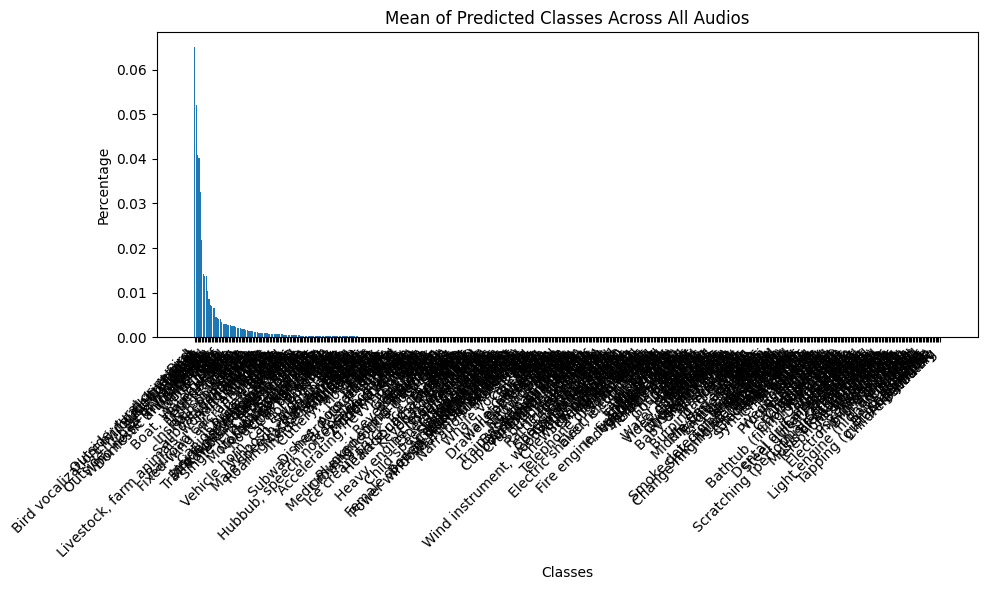

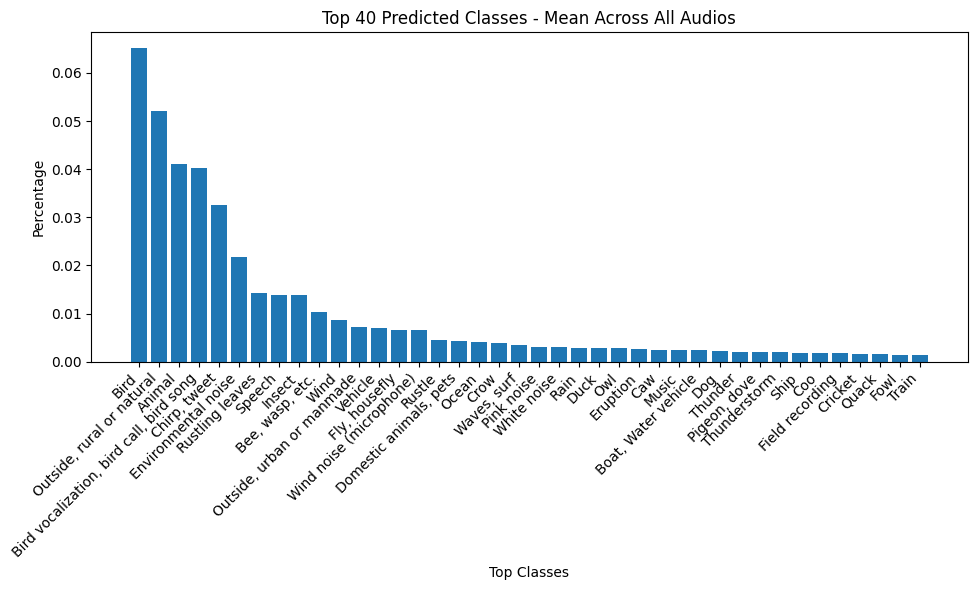

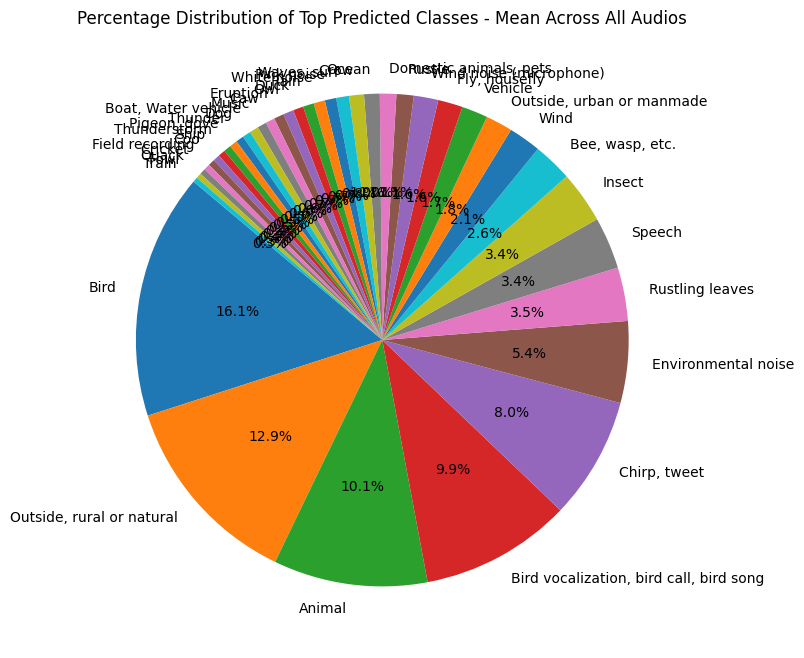

In [2]:
from tqdm import tqdm
# Initialize the SoundEventDetection model
sed = SoundEventDetection(checkpoint_path='Cnn14_DecisionLevelMax_mAP=0.385.pth', device='cuda')  # Use 'cuda' if GPU is available, otherwise use 'cpu'

# Initialize class labels
labels_csv_path = 'class_labels_indices.csv'
with open(labels_csv_path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    lines = list(reader)

labels = []
ids = []  # Each label has a unique id such as "/m/068hy"
for i1 in range(1, len(lines)):
    id = lines[i1][1]
    label = lines[i1][2]
    ids.append(id)
    labels.append(label)

class_labels = labels  # Use loaded class labels

# Define the directory containing audio files
audio_dir = './SM4559_474L_Bleu'

# Lists to store aggregated information
all_predictions = []

# Loop through each audio file in the directory
for audio_file in tqdm(os.listdir(audio_dir), desc="Processing audio files", unit="file"):
    if audio_file.endswith('.wav'):
        # print("Treating ", audio_file, "...")
        # Load the audio file
        audio_path = os.path.join(audio_dir, audio_file)
        audio, _ = librosa.core.load(audio_path, sr=32000, mono=True)

        # Reshape the audio for the model
        audio = audio[None, :]  # (batch_size, segment_samples)

        # Perform inference
        framewise_output = sed.inference(audio)

        # Aggregate predictions over all frames
        average_output = np.mean(framewise_output, axis=1)

        # Append predictions to the list
        all_predictions.append(average_output)

# Stack predictions along a new axis to calculate the mean
all_predictions_stacked = np.stack(all_predictions, axis=0)

# Calculate the mean across all predictions
mean_predictions = np.mean(all_predictions_stacked, axis=0)

# Get top predicted classes
top_classes_mean = np.argsort(mean_predictions[0, :])[::-1]

# Plot the bar chart for the mean
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_classes_mean)), mean_predictions[0, top_classes_mean], align='center')
plt.xticks(range(len(top_classes_mean)), [class_labels[idx] for idx in top_classes_mean], rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.title(f'Mean of Predicted Classes Across All Audios')
plt.tight_layout()
plt.show()

# Plot the top N classes bar chart for the mean
top_n_classes_mean = 40
top_classes_n_mean = np.argsort(mean_predictions[0, :])[::-1][:top_n_classes_mean]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_classes_n_mean)), mean_predictions[0, top_classes_n_mean], align='center')
plt.xticks(range(len(top_classes_n_mean)), [class_labels[idx] for idx in top_classes_n_mean], rotation=45, ha='right')
plt.xlabel('Top Classes')
plt.ylabel('Percentage')
plt.title(f'Top {top_n_classes_mean} Predicted Classes - Mean Across All Audios')
plt.tight_layout()
plt.savefig("2023_Goullier_Val_De_Sos_L_BLEU_plot_bar_chart.png")
plt.show()

# Plot the pie chart for the mean
plt.figure(figsize=(8, 8))
plt.pie(mean_predictions[0, top_classes_n_mean], labels=[class_labels[idx] for idx in top_classes_n_mean], autopct='%1.1f%%', startangle=140)
plt.title(f'Percentage Distribution of Top Predicted Classes - Mean Across All Audios')
plt.savefig("2023_Goullier_Val_De_Sos_L_BLEU_plot_pie_chart.png")
plt.show()


Checkpoint path: Cnn14_DecisionLevelMax_mAP=0.385.pth
Using CPU.


Processing audio files: 100%|██████████| 193/193 [2:57:23<00:00, 55.15s/file]   


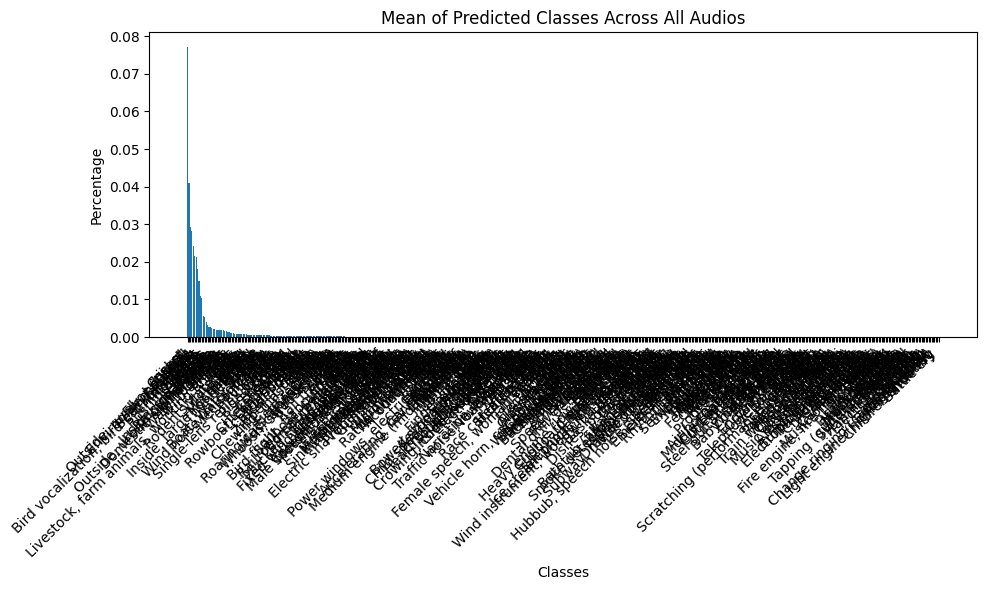

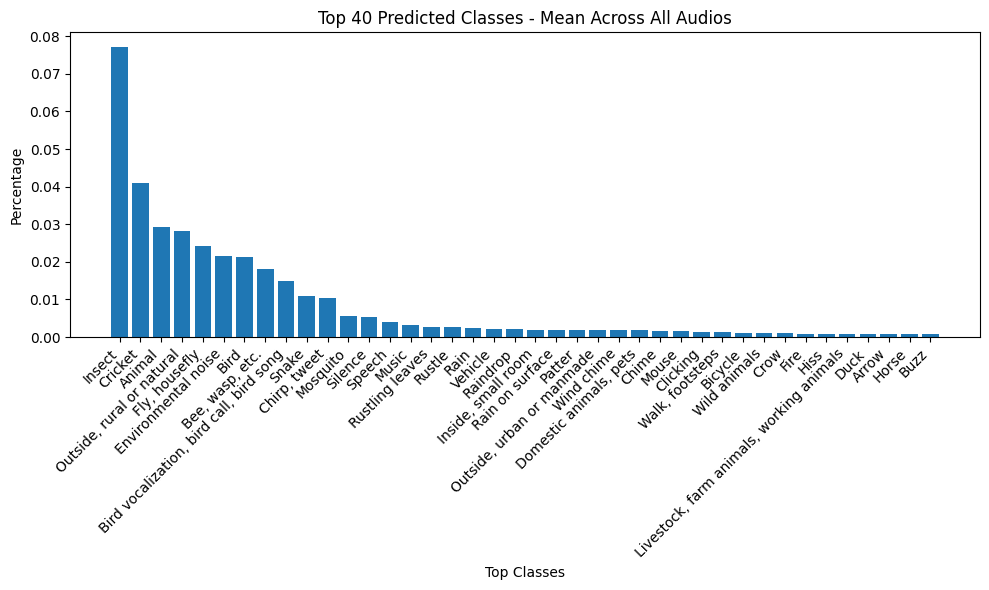

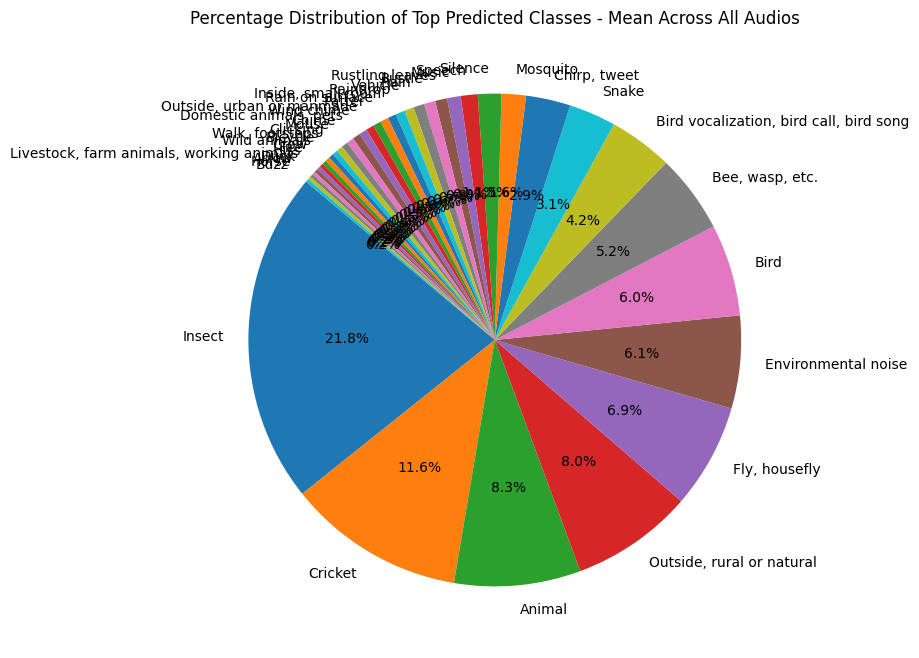

In [3]:
from tqdm import tqdm
# Initialize the SoundEventDetection model
sed = SoundEventDetection(checkpoint_path='Cnn14_DecisionLevelMax_mAP=0.385.pth', device='cuda')  # Use 'cuda' if GPU is available, otherwise use 'cpu'

# Initialize class labels
labels_csv_path = 'class_labels_indices.csv'
with open(labels_csv_path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    lines = list(reader)

labels = []
ids = []  # Each label has a unique id such as "/m/068hy"
for i1 in range(1, len(lines)):
    id = lines[i1][1]
    label = lines[i1][2]
    ids.append(id)
    labels.append(label)

class_labels = labels  # Use loaded class labels

# Define the directory containing audio files
audio_dir = './SM7140_641E_Rouge'

# Lists to store aggregated information
all_predictions = []

# Loop through each audio file in the directory
for audio_file in tqdm(os.listdir(audio_dir), desc="Processing audio files", unit="file"):
    if audio_file.endswith('.wav'):
        # print("Treating ", audio_file, "...")
        # Load the audio file
        audio_path = os.path.join(audio_dir, audio_file)
        audio, _ = librosa.core.load(audio_path, sr=32000, mono=True)

        # Reshape the audio for the model
        audio = audio[None, :]  # (batch_size, segment_samples)

        # Perform inference
        framewise_output = sed.inference(audio)

        # Aggregate predictions over all frames
        average_output = np.mean(framewise_output, axis=1)

        # Append predictions to the list
        all_predictions.append(average_output)

# Stack predictions along a new axis to calculate the mean
all_predictions_stacked = np.stack(all_predictions, axis=0)

# Calculate the mean across all predictions
mean_predictions = np.mean(all_predictions_stacked, axis=0)

# Get top predicted classes
top_classes_mean = np.argsort(mean_predictions[0, :])[::-1]

# Plot the bar chart for the mean
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_classes_mean)), mean_predictions[0, top_classes_mean], align='center')
plt.xticks(range(len(top_classes_mean)), [class_labels[idx] for idx in top_classes_mean], rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.title(f'Mean of Predicted Classes Across All Audios')
plt.tight_layout()
plt.show()

# Plot the top N classes bar chart for the mean
top_n_classes_mean = 40
top_classes_n_mean = np.argsort(mean_predictions[0, :])[::-1][:top_n_classes_mean]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_classes_n_mean)), mean_predictions[0, top_classes_n_mean], align='center')
plt.xticks(range(len(top_classes_n_mean)), [class_labels[idx] for idx in top_classes_n_mean], rotation=45, ha='right')
plt.xlabel('Top Classes')
plt.ylabel('Percentage')
plt.title(f'Top {top_n_classes_mean} Predicted Classes - Mean Across All Audios')
plt.tight_layout()
plt.savefig("2022_Bestiac_Trimouns_E_ROUGE_plot_bar_chart.png")
plt.show()

# Plot the pie chart for the mean
plt.figure(figsize=(8, 8))
plt.pie(mean_predictions[0, top_classes_n_mean], labels=[class_labels[idx] for idx in top_classes_n_mean], autopct='%1.1f%%', startangle=140)
plt.title(f'Percentage Distribution of Top Predicted Classes - Mean Across All Audios')
plt.savefig("2022_Bestiac_Trimouns_E_ROUGE_plot_pie_chart.png")
plt.show()


Checkpoint path: Cnn14_DecisionLevelMax_mAP=0.385.pth
Using CPU.


Processing audio files: 100%|██████████| 137/137 [1:54:01<00:00, 49.94s/file]


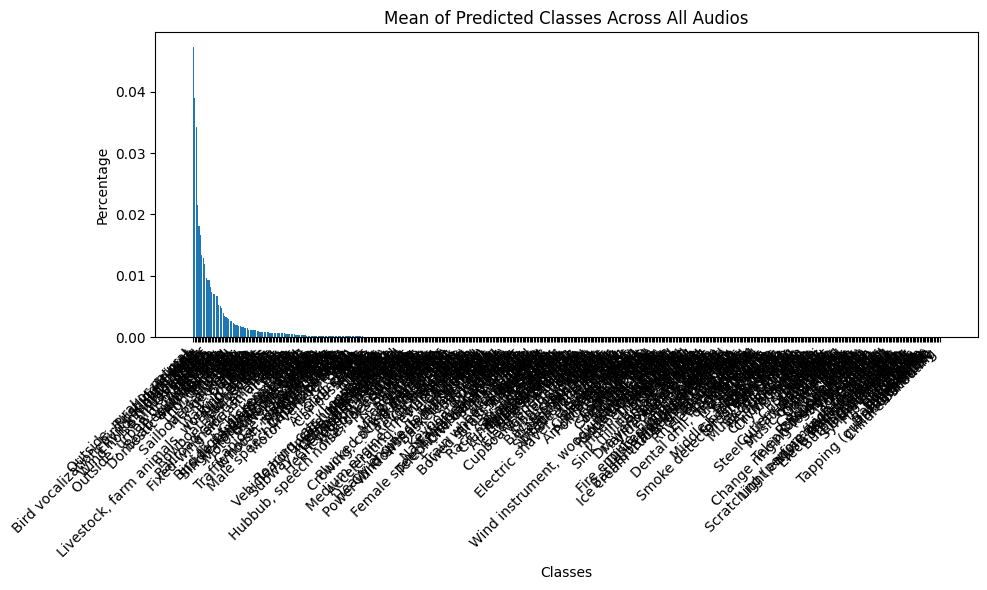

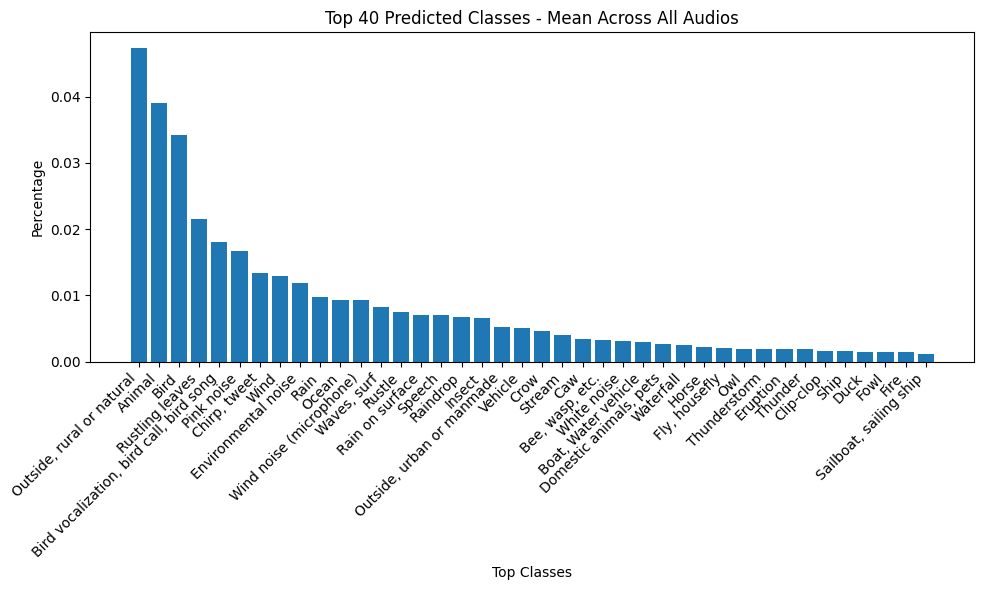

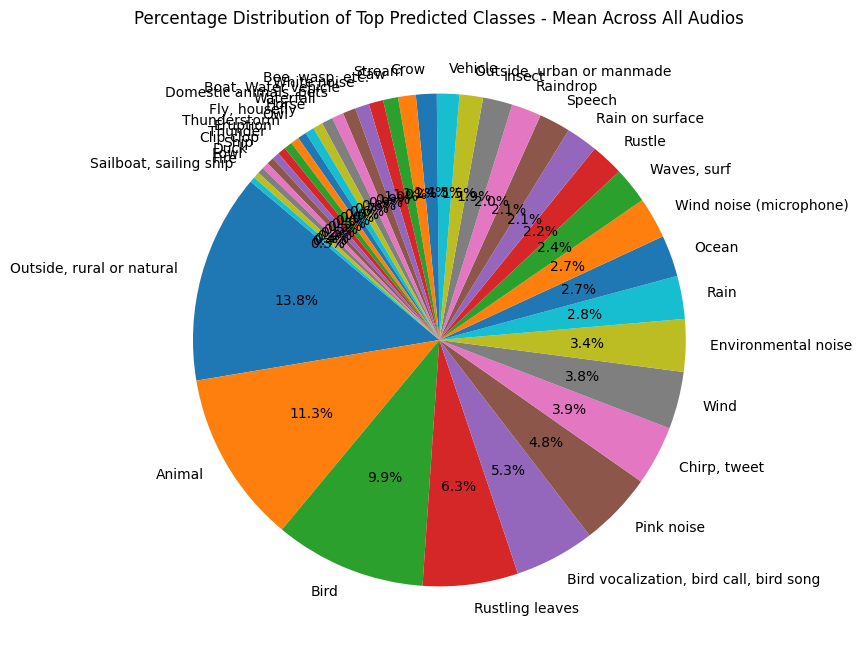

In [5]:
from tqdm import tqdm
# Initialize the SoundEventDetection model
sed = SoundEventDetection(checkpoint_path='Cnn14_DecisionLevelMax_mAP=0.385.pth', device='cuda')  # Use 'cuda' if GPU is available, otherwise use 'cpu'

# Initialize class labels
labels_csv_path = 'class_labels_indices.csv'
with open(labels_csv_path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    lines = list(reader)

labels = []
ids = []  # Each label has a unique id such as "/m/068hy"
for i1 in range(1, len(lines)):
    id = lines[i1][1]
    label = lines[i1][2]
    ids.append(id)
    labels.append(label)

class_labels = labels  # Use loaded class labels

# Define the directory containing audio files
audio_dir = './Data'

# Lists to store aggregated information
all_predictions = []

# Loop through each audio file in the directory
for audio_file in tqdm(os.listdir(audio_dir), desc="Processing audio files", unit="file"):
    if audio_file.endswith('.wav'):
        # print("Treating ", audio_file, "...")
        # Load the audio file
        audio_path = os.path.join(audio_dir, audio_file)
        audio, _ = librosa.core.load(audio_path, sr=32000, mono=True)

        # Reshape the audio for the model
        audio = audio[None, :]  # (batch_size, segment_samples)

        # Perform inference
        framewise_output = sed.inference(audio)

        # Aggregate predictions over all frames
        average_output = np.mean(framewise_output, axis=1)

        # Append predictions to the list
        all_predictions.append(average_output)

# Stack predictions along a new axis to calculate the mean
all_predictions_stacked = np.stack(all_predictions, axis=0)

# Calculate the mean across all predictions
mean_predictions = np.mean(all_predictions_stacked, axis=0)

# Get top predicted classes
top_classes_mean = np.argsort(mean_predictions[0, :])[::-1]

# Plot the bar chart for the mean
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_classes_mean)), mean_predictions[0, top_classes_mean], align='center')
plt.xticks(range(len(top_classes_mean)), [class_labels[idx] for idx in top_classes_mean], rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.title(f'Mean of Predicted Classes Across All Audios')
plt.tight_layout()
plt.show()

# Plot the top N classes bar chart for the mean
top_n_classes_mean = 40
top_classes_n_mean = np.argsort(mean_predictions[0, :])[::-1][:top_n_classes_mean]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_classes_n_mean)), mean_predictions[0, top_classes_n_mean], align='center')
plt.xticks(range(len(top_classes_n_mean)), [class_labels[idx] for idx in top_classes_n_mean], rotation=45, ha='right')
plt.xlabel('Top Classes')
plt.ylabel('Percentage')
plt.title(f'Top {top_n_classes_mean} Predicted Classes - Mean Across All Audios')
plt.tight_layout()
plt.savefig("2022_Seix_Col_de_Pause_L_BLEU_plot_bar_chart.png")
plt.show()

# Plot the pie chart for the mean
plt.figure(figsize=(8, 8))
plt.pie(mean_predictions[0, top_classes_n_mean], labels=[class_labels[idx] for idx in top_classes_n_mean], autopct='%1.1f%%', startangle=140)
plt.title(f'Percentage Distribution of Top Predicted Classes - Mean Across All Audios')
plt.savefig("2022_Seix_Col_de_Pause_L_BLEU_plot_pie_chart.png")
plt.show()


### Test de la fonction qui compare les bar plots des sites avec la grande naturalité et ceux avec la plus faible naturalité :

Checkpoint path: Cnn14_DecisionLevelMax_mAP=0.385.pth
Using CPU.


Processing audio files - Site 2: 100%|██████████| 2/2 [01:42<00:00, 51.04s/file]


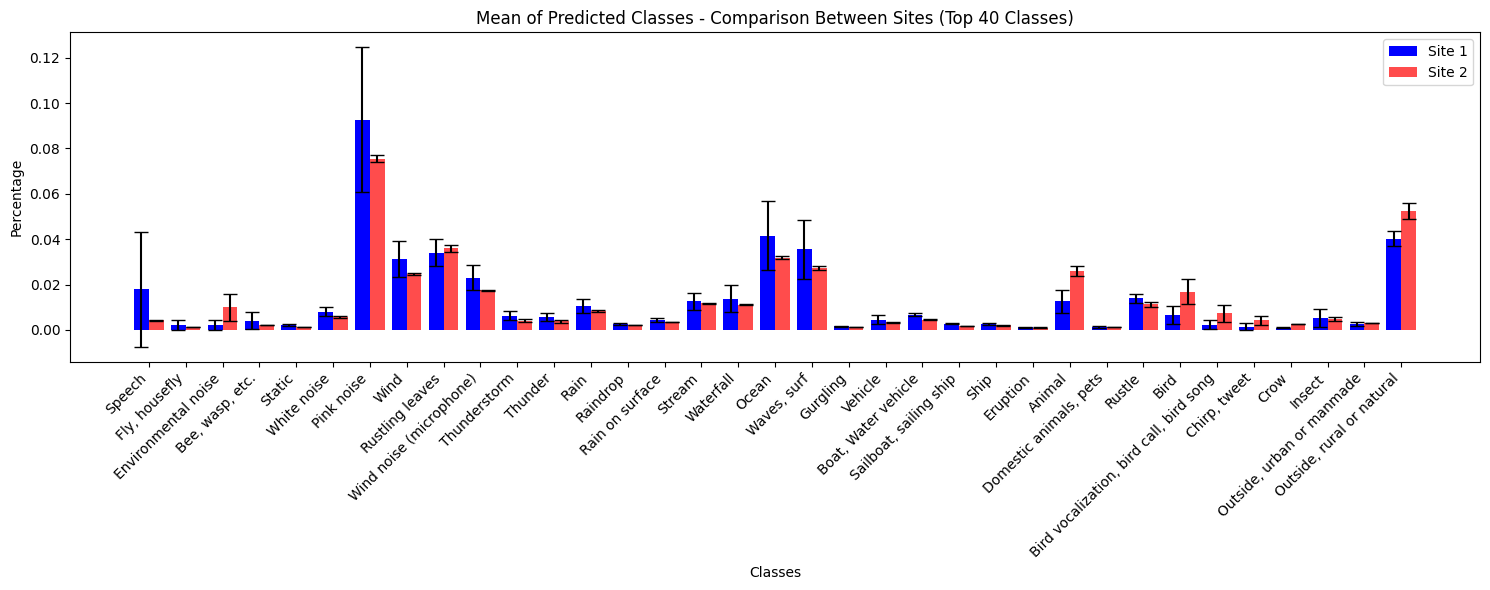

In [24]:
import numpy as np
import seaborn as sns

def create_comparison_bar_plot_with_errorbars(path1, path2, top_n_classes=40):
    from tqdm import tqdm
    import matplotlib.pyplot as plt

    # Initialize the SoundEventDetection model
    sed = SoundEventDetection(checkpoint_path='Cnn14_DecisionLevelMax_mAP=0.385.pth', device='cuda')

    # Initialize class labels
    labels_csv_path = 'class_labels_indices.csv'
    with open(labels_csv_path, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        lines = list(reader)

    labels = []
    ids = []  # Each label has a unique id such as "/m/068hy"
    for i1 in range(1, len(lines)):
        id = lines[i1][1]
        label = lines[i1][2]
        ids.append(id)
        labels.append(label)

    class_labels = labels  # Use loaded class labels

    # Lists to store aggregated information
    all_predictions_site1 = []
    all_predictions_site2 = []

    # Loop through each audio file in the directory for site 1
    for audio_file in tqdm(os.listdir(path1), desc="Processing audio files - Site 1", unit="file"):
        if audio_file.endswith('.wav'):
            # Load the audio file
            audio_path = os.path.join(path1, audio_file)
            audio, _ = librosa.core.load(audio_path, sr=32000, mono=True)

            # Reshape the audio for the model
            audio = audio[None, :]  # (batch_size, segment_samples)

            # Perform inference
            framewise_output = sed.inference(audio)

            # Aggregate predictions over all frames
            average_output = np.mean(framewise_output, axis=1)

            # Append predictions to the list for site 1
            all_predictions_site1.append(average_output)

    # Loop through each audio file in the directory for site 2
    for audio_file in tqdm(os.listdir(path2), desc="Processing audio files - Site 2", unit="file"):
        if audio_file.endswith('.wav'):
            # Load the audio file
            audio_path = os.path.join(path2, audio_file)
            audio, _ = librosa.core.load(audio_path, sr=32000, mono=True)

            # Reshape the audio for the model
            audio = audio[None, :]  # (batch_size, segment_samples)

            # Perform inference
            framewise_output = sed.inference(audio)

            # Aggregate predictions over all frames
            average_output = np.mean(framewise_output, axis=1)

            # Append predictions to the list for site 2
            all_predictions_site2.append(average_output)

    # Stack predictions along a new axis to calculate the mean
    all_predictions_stacked_site1 = np.stack(all_predictions_site1, axis=0)
    all_predictions_stacked_site2 = np.stack(all_predictions_site2, axis=0)

    # Calculate the mean across all predictions for site 1
    mean_predictions_site1 = np.mean(all_predictions_stacked_site1, axis=0)

    # Calculate the mean across all predictions for site 2
    mean_predictions_site2 = np.mean(all_predictions_stacked_site2, axis=0)

    # Calculate the standard deviation across all predictions for site 1
    std_predictions_site1 = np.std(all_predictions_stacked_site1, axis=0)

    # Calculate the standard deviation across all predictions for site 2
    std_predictions_site2 = np.std(all_predictions_stacked_site2, axis=0)

    # Get top predicted classes for both sites
    top_classes_site1 = np.argsort(mean_predictions_site1[0, :])[::-1][:top_n_classes]
    top_classes_site2 = np.argsort(mean_predictions_site2[0, :])[::-1][:top_n_classes]

    # Get the common classes between the two sites
    common_classes = set(top_classes_site1) & set(top_classes_site2)

    # Plot the bar chart for the mean with error bars for site 1
    plt.figure(figsize=(15, 6))
    plt.bar(range(len(common_classes)), mean_predictions_site1[0, list(common_classes)], yerr=std_predictions_site1[0, list(common_classes)], capsize=5, align='center', color='blue', label='grande naturalité', width=0.4)
    
    # Plot the bar chart for the mean with error bars for site 2
    plt.bar(np.arange(len(common_classes)) + 0.4, mean_predictions_site2[0, list(common_classes)], yerr=std_predictions_site2[0, list(common_classes)], capsize=5, align='center', color='red', label='petite naturalité', width=0.4, alpha=0.7)
    
    plt.xticks(np.arange(len(common_classes)) + 0.2, [class_labels[idx] for idx in list(common_classes)], rotation=45, ha='right')
    plt.xlabel('Classes')
    plt.ylabel('Percentage')
    plt.title(f'Mean of Predicted Classes - Comparison Between Sites (Top {top_n_classes} Classes)')
    plt.legend()
    plt.tight_layout()
    plt.show()

path_grande_naturalite = '.\Data_test_1'
path_petite_naturalite = '.\Data_test_2'

# Utilisation de la fonction avec deux chemins audio différents
create_comparison_bar_plot_with_errorbars(path_grande_naturalite, path_petite_naturalite, top_n_classes=40)
